In [1]:
#Import the required Libraries
import tkinter as tk
from tkinter import messagebox, filedialog
import customtkinter
from PIL import Image, ImageTk
from app_functions import erase_data, calculate_data, charge_data
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np

In [2]:
import sqlite3

connection = sqlite3.connect('db/first_light(1).db')
db = connection.cursor()
print("Connected to SQLite")

Connected to SQLite


In [1]:
connection.close()

NameError: name 'connection' is not defined

In [3]:
# Setting up theme of your app
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("green")

#Create app
root = customtkinter.CTk()
root.geometry("580x450")
root.title("Asesoría de potencias B2B monoCUPS")
root.eval("tk::PlaceWindow . center")

def login():
    #Save the DATA
    add_user = str(entry1.get())
    add_password = str(entry2.get())
    #QUERY
    sqlite_insert_with_param = """
        SELECT * 
        FROM Users 
        WHERE Usuario = ? AND Contraseña = ?;
        """
    #EXECUTE
    data_tuple = (add_user, add_password)
    exist = db.execute(sqlite_insert_with_param, data_tuple).fetchone()
    if exist is None:
        print(messagebox.askretrycancel(message="Usuario No Registrado", title="Acceso Denegado"))
        pass
    else:
        #root.destroy()
        #new_win()
        print('Corret!')

frame = customtkinter.CTkFrame(master = root)
frame.pack(pady = 20, padx=60, fill='both', expand=True)

#image = Image.open("pngs/logo_etsime.png")
#image = image.resize((400, 100), Image.ANTIALIAS)
upm_img = ImageTk.PhotoImage(file = "pngs/logo_blanco_etsime.png")
upm_widget = customtkinter.CTkLabel(frame, image = upm_img)
upm_widget.pack(pady=12, padx=10, fill='both')

label = customtkinter.CTkLabel(master=frame, text="FirstLight", text_font=("Courier", 20))
label.pack(pady=12, padx=10, fill='both') #image_label

entry1 = customtkinter.CTkEntry(master=frame, placeholder_text="Username")
entry1.pack(pady=12, padx=10)

entry2 = customtkinter.CTkEntry(master=frame, placeholder_text="Password", show="*")
entry2.pack(pady=12, padx=10)

button = customtkinter.CTkButton(master=frame, text="Login", command=login)
button.pack(pady=12, padx=10)

checkbox = customtkinter.CTkCheckBox(master=frame, text="Remeber Me")
checkbox.pack(pady=12, padx=10)

#run app
root.mainloop()

App DashBoard

In [4]:

# Setting up theme of your app
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("green")

def funcion_a_definir(value):
    print("La carga de la curva " + str(value))

def UploadAction(event=None):
    filename = filedialog.askopenfilename()
    #txt_var = tkinter.StringVar(value=filename)
    print('Select: ', filename)

def charge_data():
    #Save the DATA
    add_cliente = str(entry1.get())
    add_cups = str(entry2.get())
    #current_dateTime = entry3.get()
    add_tarifa = str(entry4.get())
    add_cif = str(entry5.get())
    #QUERY
    sqlite_insert_with_param = """INSERT INTO clientes
        (Nombre_Cliente,Cups,Fecha_de_estudio,Tarifa, Cif) 
        VALUES (?, ?, DATETIME('now'), ?, ?);"""
    #EXECUTE
    data_tuple = (add_cliente, add_cups, add_tarifa, add_cif)
    db.execute(sqlite_insert_with_param, data_tuple)
    connection.commit()
    print('Data saved in storage!')

#Create app
root_2 = customtkinter.CTk()
root_2.geometry("720x420")
root_2.title("Asesoría de potencias B2B monoCUPS")
root_2.eval("tk::PlaceWindow . center")

# configure grid layout (2x1)
root_2.grid_columnconfigure(1, weight=1)
root_2.grid_rowconfigure(0, weight=1)

frame_left = customtkinter.CTkFrame(master=root_2,
                                    width=160,
                                    corner_radius=0)

frame_left.grid(row=0, column=0, sticky="nswe", padx=20, pady=20)

frame_right = customtkinter.CTkFrame(master=root_2, 
                                    width=540,
                                    corner_radius=0)
frame_right.grid(row=0, column=1, sticky="nswe", padx=20, pady=20)

# ============ frame_left ============
# configure grid layout (1x11)
frame_left.grid_rowconfigure(0, minsize=10)   # empty row with minsize as spacing
frame_left.grid_rowconfigure(5, minsize=10)  # empty row with minsize as spacing
frame_left.grid_rowconfigure(8, minsize=20)    # empty row with minsize as spacing


label_1 = customtkinter.CTkLabel(master=frame_left,
                                        text="FirstLight",
                                        text_font=("Courier", 17))  # font name and size in px
label_1.grid(row=1, column=0, pady=10, padx=10)

label_mode = customtkinter.CTkLabel(master= frame_left, text="Carga Curva:")
label_mode.grid(row=2, column=0, pady=0, padx=20, sticky="w")
optionmenu_1 = customtkinter.CTkOptionMenu(master=frame_left,
                                                values=["Horaria", "Cuarto-Horaria"],
                                                        command=funcion_a_definir)
optionmenu_1.grid(row=3, column=0, pady=10, padx=20, sticky="w")

file_button = customtkinter.CTkButton(master=frame_left, text='Open File', command=UploadAction)
file_button.grid(row=4, column=0, pady=10, padx=20, sticky="w")

frame_info = customtkinter.CTkFrame(master=frame_left,
                                            width=160,
                                            corner_radius=0)
frame_info.grid(row=6, column=0, pady=10, padx=20, sticky="w")

# ======= frame_info =========
label_info_1 = customtkinter.CTkLabel(master= frame_info,
                                    text= "Breve descripción\n" +
                                    "sobre la app.\n" +
                                    "UPM TFG",
                                    height=120,
                                    corner_radius=6,  # <- custom corner radius
                                    fg_color=("white", "gray38"),  # <- custom tuple-color
                                    justify=customtkinter.LEFT)
label_info_1.grid(column=0, row=0, sticky="nwe", padx=10, pady=20)

# ================= frame_right =================

# configure grid layout (3x1)
frame_right.rowconfigure((0, 1, 2), weight=1)
frame_right.rowconfigure(7, weight=10)

frame_db = customtkinter.CTkFrame(master=frame_right,
                                            width=450,
                                            corner_radius=0)
frame_db.grid(row=1, column=0, pady=10, padx=10, sticky="N")


#row_0
logo_img = ImageTk.PhotoImage(file = "pngs/logo_blanco_etsime.png")
logo_widget = customtkinter.CTkLabel(frame_right, image = logo_img)
logo_widget.grid(row=0, column=0, pady=10, padx=15, sticky = "N")
#row_1
#name = StringVar()
entry1 = customtkinter.CTkEntry(frame_db, placeholder_text="Nombre Cliente")
entry1.grid(row=0, pady=5, padx=5, sticky = "N", ipadx = 75)
#cups = StringVar()
entry2 = customtkinter.CTkEntry(frame_db, placeholder_text="CUPS")
entry2.grid(row=1, pady=5, padx=5, sticky = "N", ipadx = 75)
#date= StringVar()
entry3 = customtkinter.CTkEntry(frame_db, placeholder_text="Fecha de Estudio")
entry3.grid(row=2, pady=5, padx=5, sticky = "N", ipadx = 75)
entry4 = customtkinter.CTkComboBox(frame_db, values=['2_0TD', '3_0TD', '6_1TD', '6_2TD', '6_3TD', '6_4TD'] )
entry4.grid(row=3, pady=5, padx=5, sticky = "N", ipadx = 75)
#cif = StringVar()
entry5 = customtkinter.CTkEntry(frame_db, placeholder_text="CIF")
entry5.grid(row=4, pady=5, padx=5, sticky = "N", ipadx = 75)

#row_1
button_1 = customtkinter.CTkButton(master=frame_right,
                                        text="Borrar\n" + " Datos",
                                        command=erase_data)
button_1.grid(row=2, column=0, pady=5, padx=4, sticky="SW")
button_2 = customtkinter.CTkButton(master=frame_right,
                                        text="Obtener\n" + "Datos Suministro",
                                        command=charge_data)
button_2.grid(row=2, column=0, pady=5, padx=4, sticky="S")
button_3 = customtkinter.CTkButton(master=frame_right,
                                        text="Calcular\n" + "Potencias Optimas",
                                        command=calculate_data)
button_3.grid(row=2, column = 0, pady=5, padx=4, sticky= "SE")

# set default values
entry4.set("Tarifa")

#run app
root_2.mainloop()

Final/Resuls DashBoard

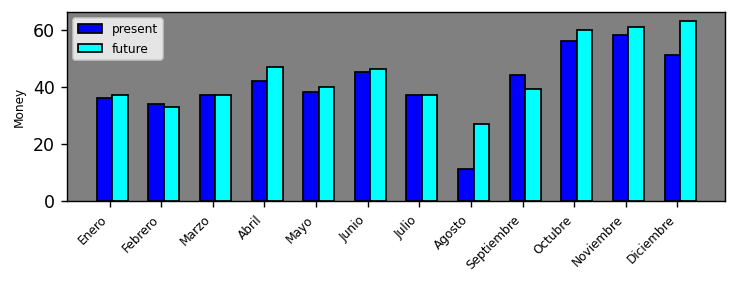

In [5]:
# Setting up theme of your app
customtkinter.set_appearance_mode("Dark")
customtkinter.set_default_color_theme("green")

#Create app
root = customtkinter.CTk()
root.geometry("720x450")
root.title("Asesoría de potencias B2B monoCUPS")
root.eval("tk::PlaceWindow . center")

def download_pdf():
    print("Descargar pdf")

frame = customtkinter.CTkFrame(master = root)
frame.pack(pady = 20, padx=20, fill='both', expand=True)

#image = Image.open("pngs/logo_etsime.png")
#image = image.resize((400, 100), Image.ANTIALIAS)
upm_img = ImageTk.PhotoImage(file = "pngs/logo_blanco_etsime.png")
upm_widget = customtkinter.CTkLabel(frame, image = upm_img)
upm_widget.pack(pady=12, padx=10)

# ============ Gráfica ===========
fig, ax = plt.subplots(figsize=(3.8, 2), dpi=100)
# width of the bars
barWidth = 0.3
# Choose the height of the blue & cyan bars
future_euros = [36, 34, 37, 42, 38, 45, 37, 11, 44, 56, 58, 51]
present_euros = [37, 33, 37, 47, 40, 46, 37, 27, 39, 60, 61, 63]
# The x position of bars
r1 = np.arange(len(future_euros))
r2 = [x + barWidth for x in r1]
# Create blue & cyan bars
ax.set_facecolor('grey')
ax.bar(r1, future_euros, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='present')
ax.bar(r2, present_euros, width = barWidth, color = 'cyan', edgecolor = 'black', capsize=7, label='future')
# general layout
plt.xticks([r + 0.1 for r in range(len(future_euros))], ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio",
        "Agosto","Septiembre","Octubre","Noviembre","Diciembre"], rotation=45, ha="right", fontsize=7)
plt.ylabel('Money', fontsize=7)
plt.legend(fontsize=7)
canvas = FigureCanvasTkAgg(fig, master = frame)
canvas.get_tk_widget().pack(side= tk.TOP, fill= tk.BOTH, expand=1)
#canvas.draw()

#row_3
frame_smaller = customtkinter.CTkFrame(master = frame)
frame_smaller.pack(pady = 8, padx=10, fill='both', expand=True)

frame_smaller.columnconfigure(2, weight=1)
frame_smaller.rowconfigure(0, weight=3)

#row_3
entry1 = customtkinter.CTkEntry(master=frame_smaller, placeholder_text="Comments", width=400, height= 200)
entry1.grid(column=0, row=0,columnspan=2, pady=8, padx=4, ipadx = 25)
button_1 = customtkinter.CTkButton(master=frame_smaller,
                                    text="PDF",
                                    width=100, 
                                    height= 80,
                                    command=download_pdf)
button_1.grid(column=2, row=0, pady=15, padx=4, ipadx = 5)


#run app
root.mainloop()


In [ ]:
#row_3
entry1 = customtkinter.CTkEntry(master=frame, placeholder_text="Comments", width=250, height= 80)
entry1.pack(pady=8, padx=7, expand=True, anchor = 'sw')
button_1 = customtkinter.CTkButton(master=root,
                                    text="PDF",
                                    width=100, 
                                    height= 80,
                                    command=download_pdf)
button_1.pack(pady=8, padx=7, expand=True, anchor = 'se')

#row_3
entry1 = customtkinter.CTkEntry(master=root, placeholder_text="Comments", width=300, height= 200)
entry1.grid(row=0, pady=8, padx=4, sticky = "SW", ipadx = 25)

button_1 = customtkinter.CTkButton(master=root,
                                    text="PDF",
                                    width=100, 
                                    height= 100,
                                    command=download_pdf)
button_1.grid(row=0, pady=15, padx=4, sticky = "SE", ipadx = 5)


#run app
root.mainloop()

Example:

In [ ]:
import tkinter
import tkinter.messagebox
import customtkinter

customtkinter.set_appearance_mode("System")  # Modes: "System" (standard), "Dark", "Light"
customtkinter.set_default_color_theme("blue")  # Themes: "blue" (standard), "green", "dark-blue"


class App(customtkinter.CTk):

    WIDTH = 780
    HEIGHT = 520

    def __init__(self):
        super().__init__()

        self.title("CustomTkinter complex_example.py")
        self.geometry(f"{App.WIDTH}x{App.HEIGHT}")
        self.protocol("WM_DELETE_WINDOW", self.on_closing)  # call .on_closing() when app gets closed

        # ============ create two frames ============

        # configure grid layout (2x1)
        self.grid_columnconfigure(1, weight=1)
        self.grid_rowconfigure(0, weight=1)

        self.frame_left = customtkinter.CTkFrame(master=self,
                                                 width=180,
                                                 corner_radius=0)
        self.frame_left.grid(row=0, column=0, sticky="nswe")

        self.frame_right = customtkinter.CTkFrame(master=self)
        self.frame_right.grid(row=0, column=1, sticky="nswe", padx=20, pady=20)

        # ============ frame_left ============

        # configure grid layout (1x11)
        self.frame_left.grid_rowconfigure(0, minsize=10)   # empty row with minsize as spacing
        self.frame_left.grid_rowconfigure(5, weight=1)  # empty row as spacing
        self.frame_left.grid_rowconfigure(8, minsize=20)    # empty row with minsize as spacing
        self.frame_left.grid_rowconfigure(11, minsize=10)  # empty row with minsize as spacing

        self.label_1 = customtkinter.CTkLabel(master=self.frame_left,
                                              text="CustomTkinter",
                                              text_font=("Roboto Medium", -16))  # font name and size in px
        self.label_1.grid(row=1, column=0, pady=10, padx=10)

        self.button_1 = customtkinter.CTkButton(master=self.frame_left,
                                                text="CTkButton",
                                                command=self.button_event)
        self.button_1.grid(row=2, column=0, pady=10, padx=20)

        self.button_2 = customtkinter.CTkButton(master=self.frame_left,
                                                text="CTkButton",
                                                command=self.button_event)
        self.button_2.grid(row=3, column=0, pady=10, padx=20)

        self.button_3 = customtkinter.CTkButton(master=self.frame_left,
                                                text="CTkButton",
                                                command=self.button_event)
        self.button_3.grid(row=4, column=0, pady=10, padx=20)

        self.label_mode = customtkinter.CTkLabel(master=self.frame_left, text="Appearance Mode:")
        self.label_mode.grid(row=9, column=0, pady=0, padx=20, sticky="w")

        self.optionmenu_1 = customtkinter.CTkOptionMenu(master=self.frame_left,
                                                        values=["Light", "Dark", "System"],
                                                        command=self.change_appearance_mode)
        self.optionmenu_1.grid(row=10, column=0, pady=10, padx=20, sticky="w")

        # ============ frame_right ============

        # configure grid layout (3x7)
        self.frame_right.rowconfigure((0, 1, 2, 3), weight=1)
        self.frame_right.rowconfigure(7, weight=10)
        self.frame_right.columnconfigure((0, 1), weight=1)
        self.frame_right.columnconfigure(2, weight=0)

        self.frame_info = customtkinter.CTkFrame(master=self.frame_right)
        self.frame_info.grid(row=0, column=0, columnspan=2, rowspan=4, pady=20, padx=20, sticky="nsew")

        # ============ frame_info ============

        # configure grid layout (1x1)
        self.frame_info.rowconfigure(0, weight=1)
        self.frame_info.columnconfigure(0, weight=1)

        self.label_info_1 = customtkinter.CTkLabel(master=self.frame_info,
                                                   text="CTkLabel: Lorem ipsum dolor sit,\n" +
                                                        "amet consetetur sadipscing elitr,\n" +
                                                        "sed diam nonumy eirmod tempor" ,
                                                   height=100,
                                                   corner_radius=6,  # <- custom corner radius
                                                   fg_color=("white", "gray38"),  # <- custom tuple-color
                                                   justify=tkinter.LEFT)
        self.label_info_1.grid(column=0, row=0, sticky="nwe", padx=15, pady=15)

        self.progressbar = customtkinter.CTkProgressBar(master=self.frame_info)
        self.progressbar.grid(row=1, column=0, sticky="ew", padx=15, pady=15)

        # ============ frame_right ============

        self.radio_var = tkinter.IntVar(value=0)

        self.label_radio_group = customtkinter.CTkLabel(master=self.frame_right,
                                                        text="CTkRadioButton Group:")
        self.label_radio_group.grid(row=0, column=2, columnspan=1, pady=20, padx=10, sticky="")

        self.radio_button_1 = customtkinter.CTkRadioButton(master=self.frame_right,
                                                           variable=self.radio_var,
                                                           value=0)
        self.radio_button_1.grid(row=1, column=2, pady=10, padx=20, sticky="n")

        self.radio_button_2 = customtkinter.CTkRadioButton(master=self.frame_right,
                                                           variable=self.radio_var,
                                                           value=1)
        self.radio_button_2.grid(row=2, column=2, pady=10, padx=20, sticky="n")

        self.radio_button_3 = customtkinter.CTkRadioButton(master=self.frame_right,
                                                           variable=self.radio_var,
                                                           value=2)
        self.radio_button_3.grid(row=3, column=2, pady=10, padx=20, sticky="n")

        self.slider_1 = customtkinter.CTkSlider(master=self.frame_right,
                                                from_=0,
                                                to=1,
                                                number_of_steps=3,
                                                command=self.progressbar.set)
        self.slider_1.grid(row=4, column=0, columnspan=2, pady=10, padx=20, sticky="we")

        self.slider_2 = customtkinter.CTkSlider(master=self.frame_right,
                                                command=self.progressbar.set)
        self.slider_2.grid(row=5, column=0, columnspan=2, pady=10, padx=20, sticky="we")

        self.switch_1 = customtkinter.CTkSwitch(master=self.frame_right,
                                                text="CTkSwitch")
        self.switch_1.grid(row=4, column=2, columnspan=1, pady=10, padx=20, sticky="we")

        self.switch_2 = customtkinter.CTkSwitch(master=self.frame_right,
                                                text="CTkSwitch")
        self.switch_2.grid(row=5, column=2, columnspan=1, pady=10, padx=20, sticky="we")

        self.combobox_1 = customtkinter.CTkComboBox(master=self.frame_right,
                                                    values=["Value 1", "Value 2"])
        self.combobox_1.grid(row=6, column=2, columnspan=1, pady=10, padx=20, sticky="we")

        self.check_box_1 = customtkinter.CTkCheckBox(master=self.frame_right,
                                                     text="CTkCheckBox")
        self.check_box_1.grid(row=6, column=0, pady=10, padx=20, sticky="w")

        self.check_box_2 = customtkinter.CTkCheckBox(master=self.frame_right,
                                                     text="CTkCheckBox")
        self.check_box_2.grid(row=6, column=1, pady=10, padx=20, sticky="w")

        self.entry = customtkinter.CTkEntry(master=self.frame_right,
                                            width=120,
                                            placeholder_text="CTkEntry")
        self.entry.grid(row=8, column=0, columnspan=2, pady=20, padx=20, sticky="we")

        self.button_5 = customtkinter.CTkButton(master=self.frame_right,
                                                text="CTkButton",
                                                border_width=2,  # <- custom border_width
                                                fg_color=None,  # <- no fg_color
                                                command=self.button_event)
        self.button_5.grid(row=8, column=2, columnspan=1, pady=20, padx=20, sticky="we")

        # set default values
        self.optionmenu_1.set("Dark")
        self.button_3.configure(state="disabled", text="Disabled CTkButton")
        self.combobox_1.set("CTkCombobox")
        self.radio_button_1.select()
        self.slider_1.set(0.2)
        self.slider_2.set(0.7)
        self.progressbar.set(0.5)
        self.switch_2.select()
        self.radio_button_3.configure(state=tkinter.DISABLED)
        self.check_box_1.configure(state=tkinter.DISABLED, text="CheckBox disabled")
        self.check_box_2.select()

    def button_event(self):
        print("Button pressed")

    def change_appearance_mode(self, new_appearance_mode):
        customtkinter.set_appearance_mode(new_appearance_mode)

    def on_closing(self, event=0):
        self.destroy()


if __name__ == "__main__":
    app = App()
    app.mainloop()


Intentar juntar ambas pantallas!!

In [ ]:
# Setting up theme of your app
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("green")

#Create app
root = customtkinter.CTk()
root.geometry("580x450")
root.title("Asesoría de potencias B2B monoCUPS")
root.eval("tk::PlaceWindow . center")

def login():
    #Save the DATA
    add_user = str(entry1.get())
    add_password = str(entry2.get())
    #QUERY
    sqlite_insert_with_param = """
        SELECT * 
        FROM Users 
        WHERE Usuario = ? AND Contraseña = ?;
        """
    #EXECUTE
    data_tuple = (add_user, add_password)
    exist = db.execute(sqlite_insert_with_param, data_tuple).fetchone()
    if exist is None:
        print(messagebox.askretrycancel(message="Usuario No Registrado", title="Acceso Denegado"))
        pass
    else:
        root.destroy()
        second_screen()
    
def second_screen():
    # Setting up theme of your app
    customtkinter.set_appearance_mode("dark")
    customtkinter.set_default_color_theme("green")
    #Functions
    def funcion_a_definir(value):
        print("La carga de la curva " + str(value))

    def UploadAction(event=None):
        filename = filedialog.askopenfilename()
        #txt_var = tkinter.StringVar(value=filename)
        print('Select: ', filename)

    def charge_data():
        #Save the DATA
        add_cliente = str(entry1.get())
        add_cups = str(entry2.get())
        #current_dateTime = entry3.get()
        add_tarifa = str(entry4.get())
        add_cif = str(entry5.get())
        #QUERY
        sqlite_insert_with_param = """INSERT INTO clientes
            (Nombre_Cliente,Cups,Fecha_de_estudio,Tarifa, Cif) 
            VALUES (?, ?, DATETIME('now'), ?, ?);"""
        #EXECUTE
        data_tuple = (add_cliente, add_cups, add_tarifa, add_cif)
        db.execute(sqlite_insert_with_param, data_tuple)
        connection.commit()
        print('Data saved in storage!')

    #Create app
    root_2 = customtkinter.CTk()
    root_2.geometry("720x420")
    root_2.title("Asesoría de potencias B2B monoCUPS")
    root_2.eval("tk::PlaceWindow . center")

    # configure grid layout (2x1)
    root_2.grid_columnconfigure(1, weight=1)
    root_2.grid_rowconfigure(0, weight=1)
    #Frame_left
    frame_left = customtkinter.CTkFrame(master=root_2,
                                        width=160,
                                        corner_radius=0)

    frame_left.grid(row=0, column=0, sticky="nswe", padx=20, pady=20)
    #Frame_right
    frame_right = customtkinter.CTkFrame(master=root_2, 
                                        width=540,
                                        corner_radius=0)
    frame_right.grid(row=0, column=1, sticky="nswe", padx=20, pady=20)

    # ================ frame_left ==================
    #            configure grid layout (1x11)
    frame_left.grid_rowconfigure(0, minsize=10)   # empty row with minsize as spacing
    frame_left.grid_rowconfigure(5, minsize=10)  # empty row with minsize as spacing
    frame_left.grid_rowconfigure(8, minsize=20)    # empty row with minsize as spacing


    label_1 = customtkinter.CTkLabel(master=frame_left,
                                          text="FirstLight",
                                          text_font=("Courier", 17))  # font name and size in px
    label_1.grid(row=1, column=0, pady=10, padx=10)

    label_mode = customtkinter.CTkLabel(master= frame_left, text="Carga Curva:")
    label_mode.grid(row=2, column=0, pady=0, padx=20, sticky="w")
    optionmenu_1 = customtkinter.CTkOptionMenu(master=frame_left,
                                                    values=["Horaria", "Cuarto-Horaria"],
                                                            command=funcion_a_definir)
    optionmenu_1.grid(row=3, column=0, pady=10, padx=20, sticky="w")

    file_button = customtkinter.CTkButton(master=frame_left, text='Open File', command=UploadAction)
    file_button.grid(row=4, column=0, pady=10, padx=20, sticky="w")

    frame_info = customtkinter.CTkFrame(master=frame_left,
                                             width=160,
                                             corner_radius=0)
    frame_info.grid(row=6, column=0, pady=10, padx=20, sticky="w")

    # =============== frame_info ================
    label_info_1 = customtkinter.CTkLabel(master= frame_info,
                                        text= "Breve descripción\n" +
                                        "sobre la app.\n" +
                                        "UPM TFG",
                                        height=120,
                                        corner_radius=6,  # <- custom corner radius
                                        fg_color=("white", "gray38"),  # <- custom tuple-color
                                        justify=customtkinter.LEFT)
    label_info_1.grid(column=0, row=0, sticky="nwe", padx=10, pady=20)

    # ================= frame_right =================
    #            configure grid layout (3x1)
    frame_right.rowconfigure((0, 1, 2), weight=1)
    frame_right.rowconfigure(7, weight=10)

    frame_db = customtkinter.CTkFrame(master=frame_right,
                                             width=450,
                                             corner_radius=0)
    frame_db.grid(row=1, column=0, pady=10, padx=10, sticky="N")

    #row_0
    logo_img = ImageTk.PhotoImage(file = "pngs/logo_blanco_etsime.png")
    logo_widget = customtkinter.CTkLabel(frame_right, image = logo_img)
    logo_widget.grid(row=0, column=0, pady=10, padx=15, sticky = "N")
    #row_1
    entry1 = customtkinter.CTkEntry(frame_db, placeholder_text="Nombre Cliente")
    entry1.grid(row=0, pady=5, padx=5, sticky = "N", ipadx = 75)
    entry2 = customtkinter.CTkEntry(frame_db, placeholder_text="CUPS")
    entry2.grid(row=1, pady=5, padx=5, sticky = "N", ipadx = 75)
    entry3 = customtkinter.CTkEntry(frame_db, placeholder_text="Fecha de Estudio")
    entry3.grid(row=2, pady=5, padx=5, sticky = "N", ipadx = 75)
    entry4 = customtkinter.CTkComboBox(frame_db, values=['2_0TD', '3_0TD', '6_1TD', '6_2TD', '6_3TD', '6_4TD'] )
    entry4.grid(row=3, pady=5, padx=5, sticky = "N", ipadx = 75)
    entry5 = customtkinter.CTkEntry(frame_db, placeholder_text="CIF")
    entry5.grid(row=4, pady=5, padx=5, sticky = "N", ipadx = 75)
    #row_2
    button_1 = customtkinter.CTkButton(master=frame_right,
                                            text="Borrar\n" + " Datos",
                                            command=erase_data)
    button_1.grid(row=2, column=0, pady=5, padx=4, sticky="SW")
    button_2 = customtkinter.CTkButton(master=frame_right,
                                            text="Obtener\n" + "Datos Suministro",
                                            command=charge_data)
    button_2.grid(row=2, column=0, pady=5, padx=4, sticky="S")
    button_3 = customtkinter.CTkButton(master=frame_right,
                                            text="Calcular\n" + "Potencias Optimas",
                                            command=calculate_data)
    button_3.grid(row=2, column = 0, pady=5, padx=4, sticky= "SE")

    # set default values
    entry4.set("Tarifa")
    #run app
    root_2.mainloop()

    
######### LOGIN PAGE ##########
    
frame = customtkinter.CTkFrame(master = root)
frame.pack(pady = 20, padx=60, fill='both', expand=True)

#image = Image.open("pngs/logo_etsime.png")
#image = image.resize((400, 100), Image.ANTIALIAS)
upm_img = ImageTk.PhotoImage(file = "pngs/logo_blanco_etsime.png")
upm_widget = customtkinter.CTkLabel(frame, image = upm_img)
upm_widget.pack(pady=12, padx=10)

label = customtkinter.CTkLabel(master=frame, text="FirstLight", text_font=("Courier", 20))
label.pack(pady=12, padx=10) #image_label

entry1 = customtkinter.CTkEntry(master=frame, placeholder_text="Username")
entry1.pack(pady=12, padx=10)

entry2 = customtkinter.CTkEntry(master=frame, placeholder_text="Password", show="*")
entry2.pack(pady=12, padx=10)

button = customtkinter.CTkButton(master=frame, text="Login", command=login)
button.pack(pady=12, padx=10)

checkbox = customtkinter.CTkCheckBox(master=frame, text="Remeber Me")
checkbox.pack(pady=12, padx=10)

#run app
root.mainloop()